In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
proj = '40Ar'
trg = '165Ho'
cn = '205At'
bf = 0.75
ch = 'xn'
sigr = 3.3
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

,E_lab,E*/MeV,199At,200At,201At,202At,203At,204At,205At
0,145.765,30.0,0.000000,0.000000,0.000000e+00,5.360000e-08,0.000001,5.690000e-09,4.560000e-12
1,147.007,31.0,0.000000,0.000000,0.000000e+00,8.660000e-07,0.000006,1.720000e-08,1.110000e-11
2,148.249,32.0,0.000000,0.000000,0.000000e+00,9.020000e-06,0.000026,4.960000e-08,2.440000e-11
3,149.492,33.0,0.000000,0.000000,0.000000e+00,7.220000e-05,0.000111,1.370000e-07,1.970000e-11
4,150.734,34.0,0.000000,0.000000,0.000000e+00,4.780000e-04,0.000440,3.680000e-07,0.000000e+00
5,151.977,35.0,0.000000,0.000000,7.890000e-09,2.610000e-03,0.001540,9.350000e-07,0.000000e+00
6,153.219,36.0,0.000000,0.000000,8.010000e-07,1.080000e-02,0.004370,2.130000e-06,0.000000e+00
7,154.462,37.0,0.000000,0.000000,2.540000e-05,3.190000e-02,0.009500,4.120000e-06,0.000000e+00
8,155.704,38.0,0.000000,0.000000,3.550000e-04,7.260000e-02,0.016300,6.700000e-06,0.000000e+00
9,156.946,39.0,0.000000,0.000000,2.670000e-03,1.370000e-01,0.023100,9.030000e-06,0.000000e+00


## Experimental values with errors

In [48]:
# exp_data = pd.read_csv('data/exp_data.dat', sep=' ')
# dfm_exp = exp_data.melt(id_vars=['E'], var_name='isotope', value_name='CS')

# 40Ar+165Ho - 
e_lab = [200]
exp = [0.7]
err_max = [[0]]
err_min = [[0]]

# 40Ar+165Ho - Vermeulen
e_lab = [164.9,170.6,178,184.3,186.8,191.7,199.2]
exp = [[np.nan, np.nan, 7.31E-01, 239, 339, 1.10E+03, 2.00E+03], [np.nan,356,3.60E+03,9.80E+03,9.10E+03,8.20E+03,965], [3.10E+03,1.13E+04,7.60E+03,1.70E+03,1.40E+03,547,104], [4.40E+03, 2.30E+03, 309, np.nan,np.nan,np.nan,np.nan,]]

#40Ar+165Ho - Yeremin


## Scaling of the values to mb, ub or nb

In [49]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()

,E_lab,E*/MeV,CS
count,357.000000,357.000000,357.000000
mean,176.825216,55.000000,325.928629
std,18.313653,14.740261,825.868164
min,145.765000,30.000000,0.000000
25%,160.674000,42.000000,0.000000
50%,176.825000,55.000000,0.014700
75%,192.977000,68.000000,118.000000
max,207.886000,80.000000,4810.000000


## Plotting

/tmp/ipykernel_99606/1640302365.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], palette=colors)
/tmp/ipykernel_99606/1640302365.py:22: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


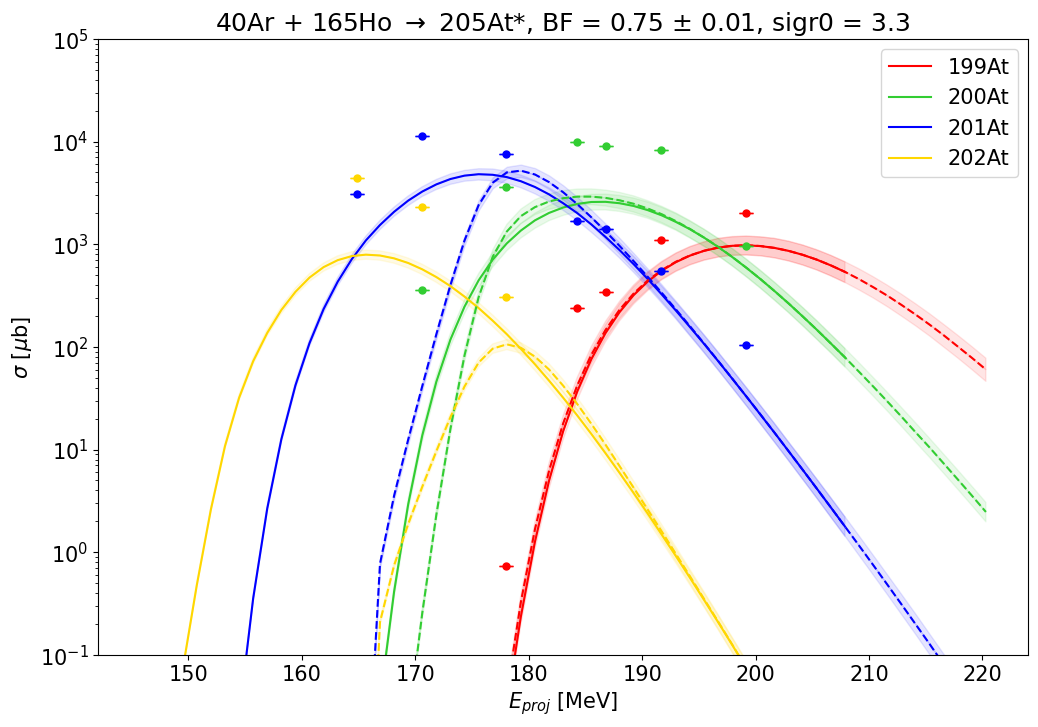

In [50]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta']
sns.color_palette("dark")

plot_from = 2
plot_to = 3

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e-1, 1e5)
# plt.xlim(100, 145)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:-plot_to]))], linestyle='--', legend=None, palette=colors)

# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)
        
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
for i in range(plot_from, len(df10.columns)-plot_to):
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from], alpha=0.1)
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from], alpha=0.1)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from], alpha=0.1)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from], alpha=0.1)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')